# COGS 118A- Project Checkpoint

# Names

- Cain Chen
- Zhigang Lin
- Xue Wang
- Hongxin Song
- Jinghong Luo

# Abstract 
The aim of this project is to predict the popularity of a new track taking features such as artists, danceability and duration etc. by generating a model based on supervised machine learning algorithms. The data we choose to use is a dataset which contains audio and other features of more than 600,000 tracks extracted from spotify ranging from 1921 to 2022. We plan to first standardize features like duration, numbers of followers of the artists and date. Then we would take a close look at the features through EDA to determine further data preprocessing procedure of the dataset. Next step is to create a baseline model using linear regression with dancibility as the sole predictive parameter. In order to generate a high- accuracy model, we would use different supervised algorithms like SVR, random forest regressor and LASSO regression with engineered features and measure their performances using different metrics such as $R^2$ and MSE. We strive for a higher $R^2$ score and a lower MSE. We will also incorporate cross validation for tuning the hyperparameters. At the end, We plan to generate a simple neural network using keras to see whether this gives us higher accuracy. 

# Background

Music has always been an important component of the entertainment industry. The emergence of pop music began with songs and pieces available as digital sound files. People's orientation to music has evolved with time, from country and rock of “the good old days”  to electronic and hip-hop styles that are nowadays popular. A variety of factors can determine the popularity of a track. Rhythm and lyrics are some of the most important features in determining the popularity as well as other features like the producer, energy and release date. Our goal is to predict the popularity<a name="ref_1"></a>[<sup>[1]</sup>](#reference_1) of the track once it is released based on basic features of the track. Other data scientists have tried to use only the audio feature of the song itself to predict its popularity<a name="ref_2"></a>[<sup>[2]</sup>](#reference_2). While they used primarily audio features to train their model, we have decided to tackle the problem from a different perspective, incorporating features such as the producer, the number of followers the artist has and the name of the track. We believe that our model enables us to predict the popularity of the track more effectively, i.e. without the need to listen to the whole track.

# Problem Statement

After looking at the dataset, we find an interesting column called <b>popularity</b>. Based on the description from the source of the data(Kaggle), this column measures how popular the track is in a range of 0 to 100. We intend to understand how the values in the popularity column are obtained. More specifically, given other columns such as energy, danceability and #_followers, can we predict the popularity of the track? Additionally, based on domain knowledge, are there any other interesting features that we can engineer in order to improve our predictions? According to other data scientists, "the genre, track lyrics, day of release, and artist are driving forces for predicting popularity."<a name="ref_3"></a>[<sup>[3]</sup>](#reference_3) Also note that the duration of the track and the number of profane words used are correlated with the popularity<a name="ref_3"></a>[<sup>[3]</sup>](#reference_3). It is clear that we have a regression problem here since the predicted values are continuous. If we take linear regression as an example, this problem can be expressed as  $popularity=w_0+w_1x_1+...+w_dx_d$ where $x_i$'s are features to be determined. Therefore our goal is to fit the best regression model with appropriate features in order to improve our prediction accuracy on popularity. 

# Original Data

### Dataset Overview<a name="data"></a>[<sup>[4]</sup>](#data_ref)
The dataset consists of two separate sub-datasets which we will combine together in this project.
* The first sub-dataset, which is based on artists' popularity, has a shape of **(1162095, 5)**, meaning we will have **1162095** observations and **5** variables.
* The second sub-dataset, which is on features of tracks, has a shape of **(586672, 20)**, meaning we will have **586672** observations and **20** variables.

### Features of the First sub-dataset
* Id: unique id of artist
* followers: number of followers for that artist
* genres: the genres associated with artist in list
* name: the name of artist
* popularity: the popularity of artist in range 0 to 100

### Features of the Second sub-dataset
* Id: unique id of track from the artist(s)
* name: name of track
* popularity: popularity of track in range 0 and 100
* duration_ms: duration of songs in milisecond
* explicit: whether it contains explicit content or not, using 1 to represent explicit and 0 otherwise.
* artists: artist(s) who created the track
* id_artists: id of artists who created the track
* release_date: date of release for the track
* danceability: how danceable a song is in range 0 to 1
* energy: how energized a song is in range 0 to 1
* key: major note of track
* loudness: how loud a song is in db
* mode: the modality of track, using 1 to represent major and 0 for minor
* speechiness: the presence of spoken words in track in range 0 to 1
* acousticness: how acoustic a track is in range 0 and 1
* instrumentalness: the absence of vocal sounds in track in range 0 to 1
* liveness: the presence of audience in track in range 0 to 1
* valence: the positiveness of the track in range 0 to 1
* tempo: the overall tempo of track in BPM
* time_signature: the time signature of the track in range 0 to 5. 

### Critical Variable Representations
* popularity (in both dataset): represented in floats in the range 0 to 100
* release_date: date of release for the track
* danceability: how danceable a song is in range 0 to 1
* energy: how energized a song is in range 0 to 1
* key: major note of track
* loudness: how loud a song is in db
* mode: the modality of track, using 1 to represent major and 0 for minor
* speechiness: the presence of spoken words in track in range 0 to 1
* acousticness: how acoustic a track is in range 0 and 1
instrumentalness: the absence of vocal sounds in track in range 0 to 1
* liveness: the presence of audience in track in range 0 to 1
* valence: the positiveness of the track in range 0 to 1
* tempo: the overall tempo of track in BPM
* time_signature: the time signature of the track in range 0 to 5

<b>Any special handling, transformations, cleaning etc will be needed:</b><br>
We will make sure to clean up the dataset to remove any unwanted duplicating observations.<br>
We will also make sure to take good care of missing data by implementing appropriate data imputation methods.


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
artists=pd.read_csv('data/artists.csv')
tracks=pd.read_csv('data/tracks.csv')

In [ ]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
def clean_text(x):
    """clean the text for aritists name, genres, and id"""
    out=x.replace('[','').\
            replace(']','').\
            replace("'",'').\
            replace(' ','').\
            strip().split(',')
    if(len(out)==1 and out[0]==''):
        return []
    else:
        return out


In [ ]:
tracks['artists']=tracks['artists'].apply(clean_text)
tracks['id_artists']=tracks['id_artists'].apply(clean_text)
artists['genres']=artists['genres'].apply(clean_text)

## Feature Engineering

##### Note:
We included two new features which were outputs from the combinations of *id_artists* from **tracks** dataset and *popularity* and *followers* column in **artists** dataset.<br>
The process of running and debugging the below two functions took 2 days, so we instead of presenting the whole process, we decided to use a completed version of the data, which will be uploaded to our group repo as well.

In [ ]:
def max_pop(x):
    """
    'artists_popularity' column
    
    input: a list of ids of artists contributed to a single track
    
    output: the maximum of popularity of the artists in the input
    """
    out=[]
    if(len(x)>0):
        for i in x:
            if len(artists[artists['id']==i]['popularity'])>0:
                out.append(artists[artists['id']==i]['popularity'].iloc[0])
    else:
        out.append(0)
    if len(out)!=0:
        return np.max(out)
    else:
        return 0

    
def tot_follower(x):
    """
    'artists_follower' column
    
    input: a list of ids of artists contributed to a single track
    
    output: the sum of followers of the artists in the input
    """
    out=[]
    if(len(x)>0):
        for i in x:
            if len(artists[artists['id']==i]['followers'])>0:
                out.append(artists[artists['id']==i]['followers'].iloc[0])
    else:
        out.append(0)
    if len(out)!=0:
        return np.sum(out)
    else:
        return 0

In [ ]:
engineered=pd.read_csv('data/tracks_pop_follower.csv')
tracks['artists_popularity']=engineered['artists_popularity']
tracks['artists_follower']=engineered['artists_follower']

In [ ]:
tracks['release_date'] = [pd.Timestamp(x) for x in tracks['release_date']]
tracks['release_weekday'] = tracks['release_date'].dt.dayofweek
tracks['release_year'] = [x.year for x in tracks['release_date']]

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(tracks[['duration_ms','loudness','tempo']])
tracks['duration_ms']=scaled[:,0]
tracks['loudness']=scaled[:,1]
tracks['tempo']=scaled[:,2]
raw=tracks.copy()
raw.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_popularity,artists_follower,release_weekday,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0.021994,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,...,0.674,0.7440,0.151,0.127,0.425564,3,4,91.0,2,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0.016885,0,[FernandoPessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,...,0.797,0.0000,0.148,0.655,0.414029,1,0,3.0,3,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0.031737,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,...,0.994,0.0218,0.212,0.457,0.529335,5,23,3528.0,1,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0.030895,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,...,0.995,0.9180,0.104,0.397,0.689907,3,23,3528.0,1,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0.028434,0,[DickHaymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,...,0.989,0.1300,0.311,0.196,0.418945,4,35,11327.0,6,1922


## Missingness Handling

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
raw.isnull().sum()

id                     0
name                  71
popularity             0
duration_ms            0
explicit               0
artists                0
id_artists             0
release_date           0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
artists_popularity     0
artists_follower       2
release_weekday        0
release_year           0
dtype: int64

We found missing values in the *name* and *artists_follower* columns. Based on our knowledege of the dataset, missing names of the tracks should be dropped and missing artists_followers should be imputed as 0.

In [ ]:
# drop observations with null track name
raw=raw.dropna(subset=['name'])
# impute observations with null artists_follower with 0
imputer=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
raw['artists_follower']=imputer.fit_transform(raw[['artists_follower']])[:,0]
raw.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_popularity,artists_follower,release_weekday,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0.021994,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,...,0.674,0.7440,0.151,0.127,0.425564,3,4,91.0,2,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0.016885,0,[FernandoPessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,...,0.797,0.0000,0.148,0.655,0.414029,1,0,3.0,3,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0.031737,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,...,0.994,0.0218,0.212,0.457,0.529335,5,23,3528.0,1,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0.030895,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,...,0.995,0.9180,0.104,0.397,0.689907,3,23,3528.0,1,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0.028434,0,[DickHaymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,...,0.989,0.1300,0.311,0.196,0.418945,4,35,11327.0,6,1922


In [ ]:
raw

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_popularity,artists_follower,release_weekday,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0.021994,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,...,0.674,0.744000,0.1510,0.1270,0.425564,3,4,91.0,2,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0.016885,0,[FernandoPessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,...,0.797,0.000000,0.1480,0.6550,0.414029,1,0,3.0,3,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0.031737,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,...,0.994,0.021800,0.2120,0.4570,0.529335,5,23,3528.0,1,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0.030895,0,[IgnacioCorsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,...,0.995,0.918000,0.1040,0.3970,0.689907,3,23,3528.0,1,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0.028434,0,[DickHaymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,...,0.989,0.130000,0.3110,0.1960,0.418945,4,35,11327.0,6,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,0.045377,0,[阿YueYue],[1QLBXKM5GCpyQQSVMNZqrZ],2020-09-26,0.560,0.5180,...,0.785,0.000000,0.0648,0.2110,0.535333,4,38,896.0,5,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0.026691,0,[ROLEMODEL],[1dy5WNgIKQU6ezkpZs4y8z],2020-10-21,0.765,0.6630,...,0.141,0.000297,0.0924,0.6860,0.609183,4,67,245944.0,2,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0.032798,0,[FINNEAS],[37M5pPGs6V1fchFJSgCguX],2020-09-02,0.535,0.3140,...,0.895,0.000150,0.0874,0.0663,0.588905,4,77,1168213.0,2,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,0.024682,0,"[GentleBones, ClaraBenin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021-03-05,0.696,0.6150,...,0.206,0.000003,0.3050,0.4380,0.365406,4,58,139106.0,4,2021


# Cleaned Data

### Dataset Overview
The datasets after cleaning are joined to one dataset.
* The cleaned dataset consists of **586601** observations and **24** features.
* The features now are imputed and scaled.
* Newly added features:
    1. **artists_popularity**: the maximum of popularity of the artists of the track
    2. **artists_follower**: the sum of followers of the artists of the track
    3. **release_weekday**: the week day extracted from the **release_date** column
    4. **release_year**: the year extracted from the **release_date** column


# EDA

##### Dataset Overview - Histograms of distribution of each columns in the dataset

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_popularity,artists_follower,release_weekday,release_year
popularity,1.000000,0.027638,0.211749,0.186878,0.302178,0.015306,0.327001,-0.033652,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.086713,0.520237,0.238253,-0.055148,0.590796
duration_ms,0.027638,1.000000,-0.016753,-0.120411,0.024782,0.004625,0.000314,-0.027604,-0.125783,-0.064394,0.069327,0.002139,-0.163233,-0.001249,0.037553,0.015081,0.026794,-0.015532,0.054084
explicit,0.211749,-0.016753,1.000000,0.150216,0.123060,0.010933,0.134598,-0.051757,0.102251,-0.149001,-0.067510,-0.013113,-0.016551,0.005723,0.044442,0.126733,0.131067,0.009177,0.208475
danceability,0.186878,-0.120411,0.150216,1.000000,0.241464,0.018837,0.251394,-0.044726,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,0.146166,0.004443,0.035566,-0.003721,0.226596
energy,0.302178,0.024782,0.123060,0.241464,1.000000,0.036303,0.764744,-0.065238,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.188971,0.110150,0.088325,-0.040121,0.460131
key,0.015306,0.004625,0.010933,0.018837,0.036303,1.000000,0.027106,-0.129495,-0.001034,-0.027427,-0.006788,-0.006763,0.019998,0.004912,0.008871,0.002484,0.002572,0.000689,0.023678
loudness,0.327001,0.000314,0.134598,0.251394,0.764744,0.027106,1.000000,-0.040456,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.164376,0.088852,0.115858,-0.030250,0.447057
mode,-0.033652,-0.027604,-0.051757,-0.044726,-0.065238,-0.129495,-0.040456,1.000000,-0.017992,0.058914,-0.010023,0.007025,0.011494,0.007877,-0.015899,0.000496,-0.012043,-0.004084,-0.081315
speechiness,-0.047415,-0.125783,0.102251,0.199291,-0.053560,-0.001034,-0.167140,-0.017992,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.114211,0.051690,-0.020338,0.009051,-0.081996
acousticness,-0.370723,-0.064394,-0.149001,-0.242838,-0.715366,-0.027427,-0.519423,0.058914,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.173920,-0.150316,-0.109524,0.045587,-0.527429


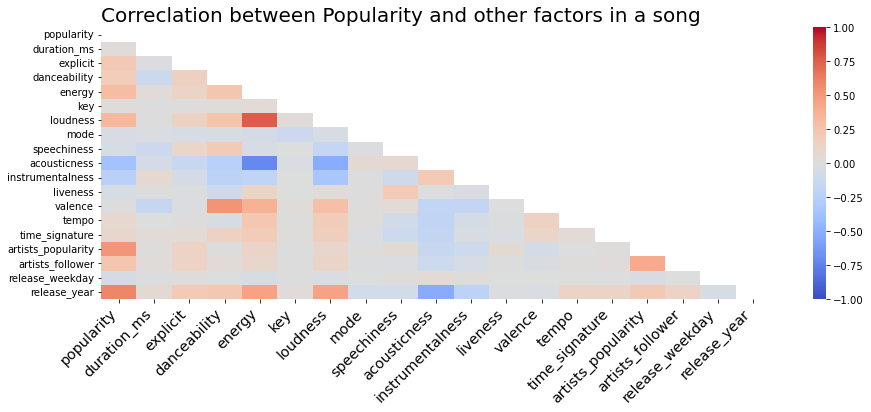

In [ ]:
#Creating mask for dropping upper triangle of the heat map 
heatM = np.triu(raw.corr())

#Setting up the plot
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Correclation between Popularity and other factors in a song", fontsize=20, loc='left')

#Showing heatmap
ax = sns.heatmap(raw.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = False, mask = heatM)
#adjusting the text on x-axis so that it does not overlap
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

The color of the heatmap gets more red as the correlation between two factors are higher, and the color gets more blue as the correlation between two factors are low. As we can see from the above correlation table and heatmap between popularity and other variables in a song, some of the top factors in a song that has a strong correlation with popularity are: release year, artists popularity, loudness, energy, daceability. 

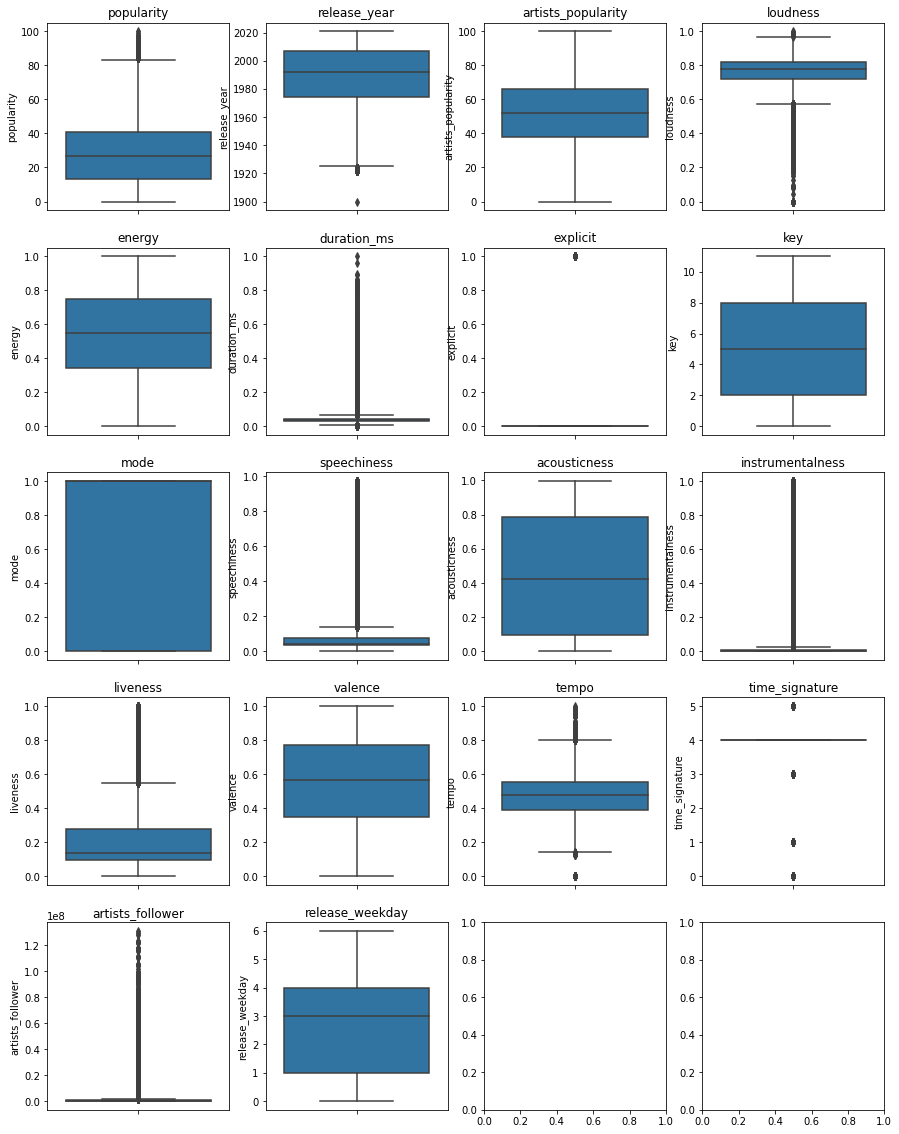

In [ ]:
fig, ax =plt.subplots(5,4)
fig.set_size_inches(15, 20, forward=True)

# Visualizing outliers of each variable using boxplots
sns.boxplot(y=raw['popularity'], ax=ax[0,0]).set(title="popularity")
sns.boxplot(y=raw['release_year'], ax=ax[0,1]).set(title="release_year")
sns.boxplot(y=raw['artists_popularity'], ax=ax[0,2]).set(title="artists_popularity")
sns.boxplot(y=raw['loudness'], ax=ax[0,3]).set(title="loudness")
sns.boxplot(y=raw['energy'], ax=ax[1,0]).set(title="energy")
sns.boxplot(y=raw['duration_ms'], ax=ax[1,1]).set(title="duration_ms")
sns.boxplot(y=raw['explicit'], ax=ax[1,2]).set(title="explicit")
sns.boxplot(y=raw['key'], ax=ax[1,3]).set(title="key")
sns.boxplot(y=raw['mode'], ax=ax[2,0]).set(title="mode")
sns.boxplot(y=raw['speechiness'], ax=ax[2,1]).set(title="speechiness")
sns.boxplot(y=raw['acousticness'], ax=ax[2,2]).set(title="acousticness")
sns.boxplot(y=raw['instrumentalness'], ax=ax[2,3]).set(title="instrumentalness")
sns.boxplot(y=raw['liveness'], ax=ax[3,0]).set(title="liveness")
sns.boxplot(y=raw['valence'], ax=ax[3,1]).set(title="valence")
sns.boxplot(y=raw['tempo'], ax=ax[3,2]).set(title="tempo")
sns.boxplot(y=raw['time_signature'], ax=ax[3,3]).set(title="time_signature")
sns.boxplot(y=raw['artists_follower'], ax=ax[4,0]).set(title="artists_follower")
sns.boxplot(y=raw['release_weekday'], ax=ax[4,1]).set(title="release_weekday")
plt.show()

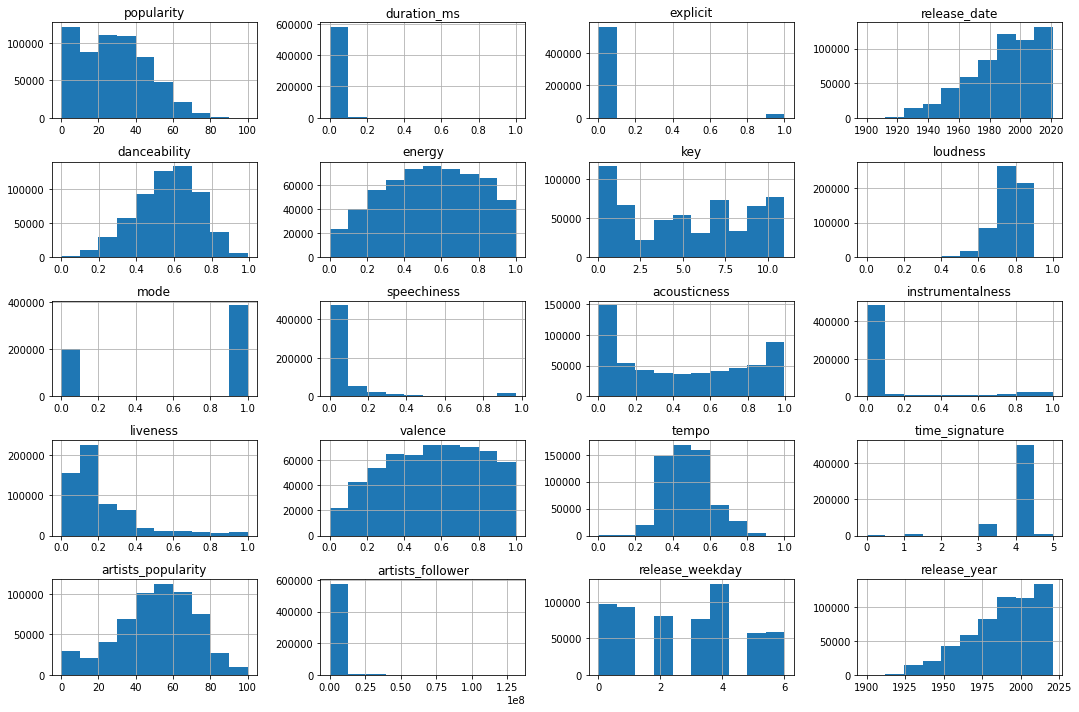

In [ ]:
raw.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

We have plotted the distribution and box plot of each variables in our dataset. We saw that some variable's data are not normally distributed and had significant outliers. Some are because of the type of data, for example "explicit" are a boolean value and therefore the distribution and box plot are not normal. 

As mentioned in the problem statement above, the **genre, track lyrics, day of release, and artist** are proven by other data scientists to be useful for predicting the popularity of the track. So we attempt to plot the release date of the track vs. the popularity of the track. 

![date_pop](edas/date_pop.png)

As shown in the plot, more recently released tracks tend to be more popular. We can also see that the color of the lines are determined by the Key column, which represents the major note of the track. We can observe that keys such as 0 and 7 are more popular in general and keys such as 3 and 8 are less popular. From the plot, we can see that people generally prefer more recently released tracks with 0 or 7 as the major key. We can see that the release year of the track has a correlation with the popularity of the track.

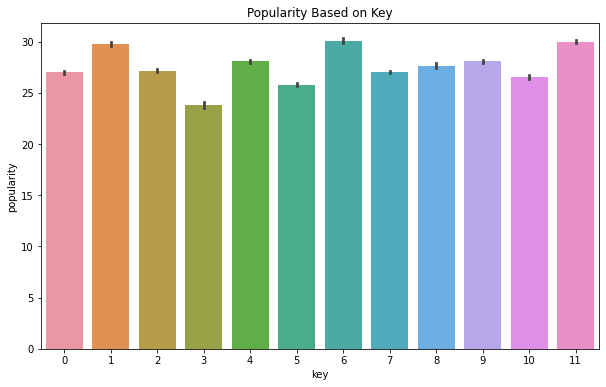

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'key', y = 'popularity', data = raw)
plt.title('Popularity Based on Key')
plt.show()

From the mean popularity of each key group, we can tell that people prefer songs with keys 1, 6 and 11 over the others whereas the songs with 3 as key are less preferred.

Let’s further examine the dataset and plot **Energy vs. Popularity**.

![energy_pop](edas/energy_pop.png)

**Energy** is defined as how energized a track is between 0 and 1. From the plot we can see that people don’t like tracks that are too dampened or too energized. Instead, they prefer somewhere in the middle. We can see that people prefer tracks that are between 65% and 75% energized. It seems like there is a **quadratic** relationship between Energy and Popularity.

We see that there is another column called **Loudness** which means how loud a track is between 0 and 1. Intuitively, we can think of Energy and Loudness as interchangeable, i.e. as energy increases, loudness increases. Additionally, Energy and Loudness are on the same scale, thus let’s try to plot Loudness vs. Popularity. 

![loud_pop](edas/loud_pop.png)

We see that the trend is similar to the previous plot. This shows that people prefer tracks with a loudness between 0.75 and 0.85. Since these two plots look quite similar, it might be an indicator that we might need to perform PCA.

We can find another column which may have similar relationship to Popularity as the previous two. 

![dance_pop](edas/dance_pop.png)

As shown above, we see that the relationship between **danceability** and **popularity** is similar to the previous two. People prefer tracks that are 60% to 70% danceable. 

Intuitively, we would think that the **artist** of the track has an impact on the **popularity** of that track. For example, if I wrote a song versus Drake wrote a song, we would predict that the track that Drake wrote is more popular. Let’s see if that’s the case.

![pop_pop_fo](edas/pop_pop_fo.png)

We see that the x-axis represents the maximum number of **popolarity** among artists that produced the track. The data points are sized by the **total number of followers** among artists that produced the track. As shown in the plot, popularity of the track increases as the maximum number of popularity among artists that produced the track increases. Additionally,  popularity of the track increases as the **total number of followers** among artists that produced the track increases. This confirms our guess that the artist of the track has a positive correlation to the popularity of that track.

Now we want to further investigate the relationship of other columns with popularity.<br>
First, we will take a closer look at the ***time_signiture*** column

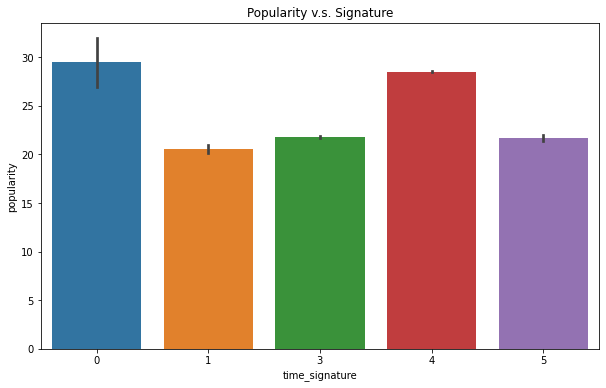

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x = 'time_signature', y = 'popularity', data = raw)
plt.title('Popularity v.s. Signature')
plt.show()

We can see that the songs with **0** as time signature have the highest mean popularity whereas the songs with **1** as time signature have the lowest mean popularity score. People prefer songs with time signature 0 and 4 significantly over songs with 1, 3, 5 as time signature. 

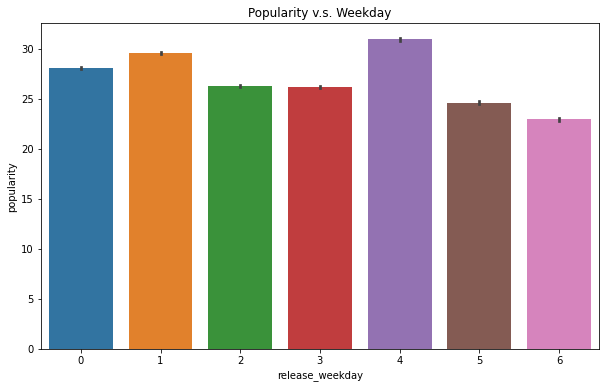

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'release_weekday', y = 'popularity', data = raw)
plt.title('Popularity v.s. Weekday')
plt.show()

We can see that songs released on Sunday have the lowest popularity score and songs released on Friday have the highest popularity.  If we were to predict two song’s popularity based purely on the week they are released, we would predict that songs released on Tuesday and Friday would have a higher popularity compared to songs released on Sunday. 

Next, we examine the relationship between the number of followers the artist has vs the artist's popularity. 

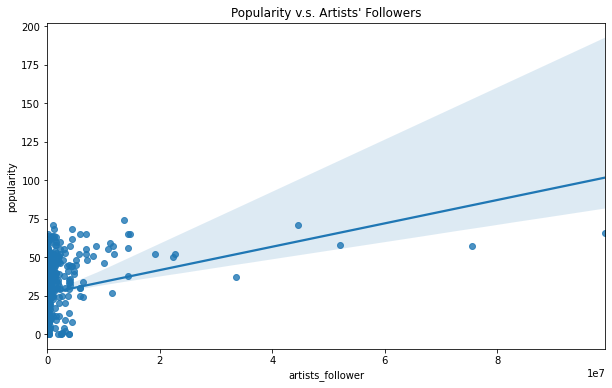

In [ ]:
plt.figure(figsize=(10,6))
dfSample = raw.copy() 
dfSample = dfSample.sample(500)
sns.regplot(x = 'artists_follower', y = 'popularity', data = dfSample)
plt.title("Popularity v.s. Artists' Followers")
plt.show()

Due to the number of data points we have, we first randomly sampled 500 unique data points and plot the relationship using a regression plot. Based on the positive regression line, we can safely say that as the number of followers increases, the popularity rate also tends to increase, but due to some of the outliers, we cannot get a clear view on what the scatter plot looks like. So we have decided to further examine the relationship by removing the outliers using the interquartile range method. The reason why we are using the interquartile range method to remove outliers is because we can clearly observe that the distribution of artists' follower does not follow the Gaussian distribution, rather it is skewed left.

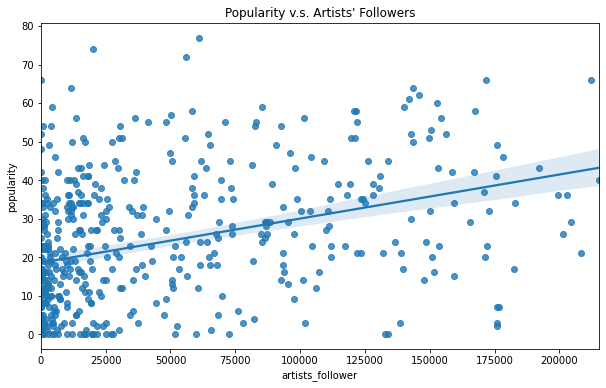

In [ ]:
plt.figure(figsize=(10,6))
dfSample = raw.copy() 
dfSample = dfSample[(dfSample["artists_follower"] < dfSample["artists_follower"].quantile(0.60))]
dfSample = dfSample.sample(500)
sns.regplot(x = 'artists_follower', y = 'popularity', data = dfSample)
plt.title("Popularity v.s. Artists' Followers")
plt.show()

We apply the interquartile range method to filter out the number of followers that are greater than the 60% percentile. Now, we can see a clear trend of correlation that as the artist's follower increases, the popularity tends to also increase.

# Proposed Solution

We have two datasets for this project, tracks.csv and artists.csv. We see that these datasets can be joined on the column artist_id which serves as the primary key in artists.csv and as the foreign key in tracks.csv. We will first perform a left join on these datasets.

We will use the subset of the dataset where both tracks_name and artist_name only contain English characters. We anticipate that the cardinality will be smaller after this procedure but still satisfies the requirement.

We intend to build a regression model to predict the popularity of a song using pipeline-engineered features from the cleaned and processed data combined from the two datasets mentioned above.


**Baseline Model** $$Popularity=w_{Dancibility}*Dancibility + w_0$$
The intention of the baseline model is to set a basic standard of the performance of the model for further improvement. This means that the performance of our final model cannot be worse than this one.


**Improved Model** $$Popularity=w_1X_1+w_2X_2+...+w_dX_d+w_0$$
The improved Model would contain all of the engineered features with statistical significance.


**Final Model**<br>
**K-nearnest neighbors Regressor** model with all of the numerical features.


# Evaluation Metrics

intuitive evaluation metric is the **mean squared error(MSE)**,$\frac{1}{n}\sum\limits _{i=1} ^{n}(y_{pred}-y_{actural})^2 $. MSE measures how much our predictions are away from the actual targets, which means that we seek a relatively low value of MSE.



* Since our solutions include a baseline model, we would like to have an evaluation metric for the improvements of performance for different models. We plan to use the **R-squared** metric, i.e. $R^2=1-  \frac{\sum\limits_{i=1}^{n}(y_{pred}-y_{actural})^2}{\sum\limits_{i=1}^{n}(y_{bar}-y_{i})^2}$. $R^2$ measures how much of the variance in y can be explained by x. This way, we will have an idea of how much our model improved by comparing the R2 value of different models .



* In order to tune our hyperparameters and avoid overfitting, we plan to use the classical **k-fold cross validation** strategy. k-fold cross validation allows us to test different hyperparameters on a validation set. By introducing a validation set, we believe that our model will be less susceptible to overfitting.



# Preliminary results

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV,learning_curve
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [4]:
raw = pd.read_csv('raw.csv')

In [5]:
X=raw.drop(['popularity'],axis=1)
y=raw['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)


In [6]:
def print_scores(scores):
    print()
    print('CV scores: ')
    print('Mean Trianing R2: ',np.mean(scores['train_r2']))
    print('Mean Trianing MSE: ',np.mean(-scores['train_neg_mean_squared_error']))
    print('Mean Testing R2: ',np.mean(scores['test_r2']))
    print('Mean Testing MSE: ',np.mean(-scores['test_neg_mean_squared_error']))
    print()

##### We fitted a total of five models. The first one is a simple linear regerssion model including only the Danceability feature. 

### Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scores=cross_validate(linreg, 
                X_train[['danceability']], 
                y_train, cv=5,
                scoring=['neg_mean_squared_error','r2'],
                verbose=3,
                n_jobs=-1,
              return_train_score=True)

print_scores(scores)
print('Test Socres:')
print('Test MSE: ',
      np.mean((linreg.fit(X_train[['danceability']],y_train).predict(X_test[['danceability']])-y_test)**2))
print('Test R2:',linreg.score(X_test[['danceability']],y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



CV scores: 
Mean Trianing R2:  0.034934547677855955
Mean Trianing MSE:  326.2643654613989
Mean Testing R2:  0.03492648127834792
Mean Testing MSE:  326.2659288157718

Test Socres:
Test MSE:  324.40426376992116
Test R2: 0.034899221497143196


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Our baseline model  $Popularity=w_{Dancibility}*Dancibility + w_0$ gives a Test MSE of *324.4*, and a Test *$R^2$* of 0.035, which means there is still spaces for improvement.

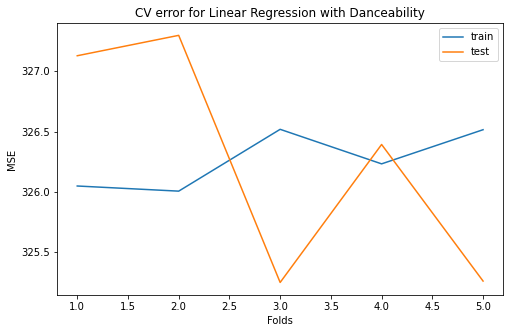

In [ ]:
train_score=scores['train_neg_mean_squared_error']
test_score=scores['test_neg_mean_squared_error']
plt.figure(figsize=(8,5))
plt.plot([1,2,3,4,5],-train_score,label='train')
plt.plot([1,2,3,4,5],-test_score,label='test')
plt.legend()
plt.title('CV error for Linear Regression with Danceability')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

As shown from the plot, our first baseline model needs improvement. Since we included only one feature in this model, the next step is to add additional features and evaluate the performance of the updated model.

### All-inclusive Model

##### The second model is a multi-variate regression including all of the numeric features
$$Popularity=w_1X_1+w_2X_2+...+w_dX_d+w_0$$
where X's are all of the scaled and engineered features.

In [ ]:
X_train=X_train.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)
linreg = LinearRegression()
scores=cross_validate(linreg, 
                X_train, 
                y_train, cv=5,
                scoring=['neg_mean_squared_error','r2'],
                verbose=3,
                n_jobs=-1,
              return_train_score=True)

print_scores(scores)
print('Test Socres:')
print('Test MSE: ',
      np.mean((linreg.fit(X_train,y_train).predict(X_test)-y_test)**2))
print('Test R2:',linreg.score(X_test,y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished



CV scores: 
Mean Trianing R2:  0.5313361158871603
Mean Trianing MSE:  158.44336972290898
Mean Testing R2:  0.5312529641705244
Mean Testing MSE:  158.46931717498614

Test Socres:
Test MSE:  157.24647018379198
Test R2: 0.5321926751898443


Our second model  $Popularity=w_1X_1+w_2X_2+...+w_dX_d+w_0$ gives a Test MSE of *157.2*, and a Test $R^2$
of 0.53, which means improvement of the model performance to some extent:
<ul>
    <li>MSE decreased 166</li>
    <li>$R^2$ increased 50%</li>
</ul>

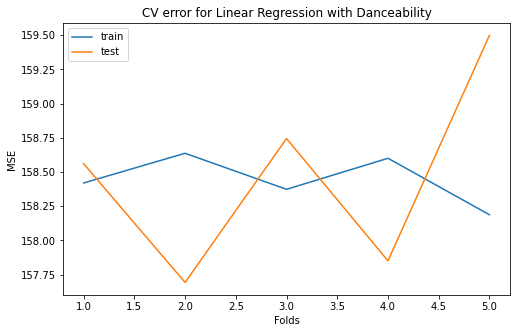

In [ ]:
train_score=scores['train_neg_mean_squared_error']
test_score=scores['test_neg_mean_squared_error']
plt.figure(figsize=(8,5))
plt.plot([1,2,3,4,5],-train_score,label='train')
plt.plot([1,2,3,4,5],-test_score,label='test')
plt.legend()
plt.title('CV error for Linear Regression with Danceability')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

As shown in the plot, our second model exhibits a more stable performance than the first one. However, the training and testing MSE are still high and we look forward for further improvement with more complex models.

We will try some non-linear models in the next step. The first one we tried is the **KNN regressor**. There are many advantages of the KNN models including but not limited to simplicity, non-parametric, and versatility. We hope to improve our predictions by using this model. We will be using GridSearchCV to tune the number of k.

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train=X_train.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)

knn = KNeighborsRegressor(n_jobs=-1)


reg = GridSearchCV(knn, 
                    {'n_neighbors':[1,3,5,7,9]}, 
                    cv=5,
                    scoring='neg_mean_squared_error',
                    verbose=3,
                    n_jobs=-1,
                    return_train_score=True)

reg.fit(X_train,y_train)

print('Test Socres:')
print('Test MSE: ',
      np.mean((reg.best_estimator_.fit(X_train,y_train).predict(X_test)-y_test)**2))
print('Test R2:',reg.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   31.0s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   35.0s finished


Test Socres:
Test MSE:  120.0593461067536
Test R2: 0.6428241508059764


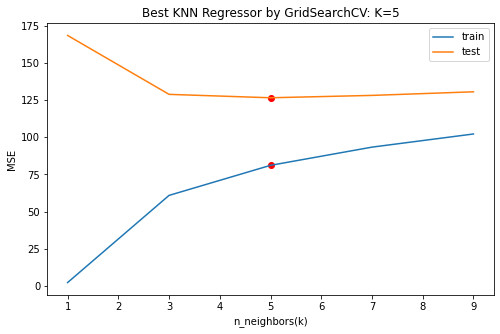

In [ ]:
train_score=reg.cv_results_['mean_train_score']
test_score=reg.cv_results_['mean_test_score']
plt.figure(figsize=(8,5))
plt.plot([1,3,5,7,9],-train_score,label='train')
plt.plot([1,3,5,7,9],-test_score,label='test')
best_k=reg.best_params_['n_neighbors']
plt.scatter(best_k,-train_score[2],c='r')
plt.scatter(best_k,-test_score[2],c='r')
plt.legend()
plt.title('Best KNN Regressor by GridSearchCV: K=5')
plt.xlabel('n_neighbors(k)')
plt.ylabel('MSE')
plt.show()

As shown in the plot, the best number of k picked by GridSearchCV is **5**. <br>
The test MSE asscociated with it is **120.06**. Even though this might still seem a bit high, we decreased the test MSE by 37.14, which is about **24%** better than our previous model. <br>
To further improve our model, we think that PCA and polynomial features might help us. In EDA we looked at different features and some of them seem quite similar. Additionally, quite a few features exhibit quardratic relationship to the track popularity. Therefore we will be taking these steps next.

### XGBoost

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
reg_xgb = GradientBoostingRegressor(verbose=3,n_estimators= 400,max_depth=None)

In [23]:
y_pred = reg_xgb.fit(X_train,y_train).predict(X_test)
r = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE for Random Forest Model: {:.4f}".format(mse))
print("Test R2 for Random Forest Model: {:.4f}".format(r))     

      Iter       Train Loss   Remaining Time 
         1         273.8407          111.00m
         2         221.8110           96.28m
         3         179.6669           90.40m
         4         145.5302           87.30m
         5         117.8794           85.46m
         6          95.4823           83.97m
         7          77.3407           82.96m
         8          62.6460           82.39m
         9          50.7432           82.35m
        10          41.1020           82.10m
        11          33.2926           81.32m
        12          26.9670           80.34m
        13          21.8433           79.58m
        14          17.6931           79.00m
        15          14.3314           78.60m
        16          11.6084           78.12m
        17           9.4028           77.50m
        18           7.6163           77.28m
        19           6.1692           76.95m
        20           4.9970           76.38m
        21           4.0476           76.05m
        2

In [24]:
print("Test MSE for XGBoost Model: {:.4f}".format(mse))
print("Test R2 for XGBoost Model: {:.4f}".format(r)) 

Test MSE for XGBoost Model: 83.5206
Test R2 for XGBoost Model: 0.7515


Due to the long runtime of XGBoost, we were't able to perform grid search. However, the results out of this model are pretty promising with a 83 MSE and 0.75 R2 score. 

### Random Forest Regressor

In [7]:
X_train=X_train.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)

In [10]:
from sklearn.ensemble import RandomForestRegressor
#building a random forest regressor
regressor_rf = RandomForestRegressor(verbose=3,n_jobs=-1)

#Create a parameter grid for grid search
param_grids = { 
    'n_estimators': [10,50,200],    
    'max_depth' : [None,5,10]    
}

#Getting the best hyperparameter
reg_rf = GridSearchCV(estimator=regressor_rf, param_grid=param_grids, cv=5, scoring='neg_mean_squared_error',
                    verbose=10,
                    return_train_score=True,
                    n_jobs=-1
                   )

In [11]:
reg_rf.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=None, n_estimators=10.............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 1/9] END max_depth=None, n_estimators=10;, score=(train=-9.823, test=-53.466) total time=  40.7s
[CV 2/5; 1/9] START max_depth=None, n_estimators=10.............................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 1/9] END max_depth=None, n_estimators=10;, score=(train=-9.874, test=-53.274) total time=  37.1s
[CV 3/5; 1/9] START max_depth=None, n_estimators=10.............................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 1/9] END max_depth=None, n_estimators=10;, score=(train=-9.771, test=-53.855) total time=  41.8s
[CV 4/5; 1/9] START max_depth=None, n_estimators=10.............................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 1/9] END max_depth=None, n_estimators=10;, score=(train=-9.912, test=-53.835) total time=  37.3s
[CV 5/5; 1/9] START max_depth=None, n_estimators=10.............................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 1/9] END max_depth=None, n_estimators=10;, score=(train=-9.835, test=-53.868) total time=  37.2s
[CV 1/5; 2/9] START max_depth=None, n_estimators=50.............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 2/9] END max_depth=None, n_estimators=50;, score=(train=-7.115, test=-48.601) total time= 3.2min
[CV 2/5; 2/9] START max_depth=None, n_estimators=50.............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 2/9] END max_depth=None, n_estimators=50;, score=(train=-7.162, test=-48.879) total time= 3.1min
[CV 3/5; 2/9] START max_depth=None, n_estimators=50.............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 2/9] END max_depth=None, n_estimators=50;, score=(train=-7.109, test=-48.818) total time= 3.1min
[CV 4/5; 2/9] START max_depth=None, n_estimators=50.............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 2/9] END max_depth=None, n_estimators=50;, score=(train=-7.170, test=-49.227) total time= 3.1min
[CV 5/5; 2/9] START max_depth=None, n_estimators=50.............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 2/9] END max_depth=None, n_estimators=50;, score=(train=-7.104, test=-48.810) total time= 3.1min
[CV 1/5; 3/9] START max_depth=None, n_estimators=200............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   10.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   17.4s finished


[CV 1/5; 3/9] END max_depth=None, n_estimators=200;, score=(train=-6.618, test=-47.755) total time=12.3min
[CV 2/5; 3/9] START max_depth=None, n_estimators=200............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   10.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 3/9] END max_depth=None, n_estimators=200;, score=(train=-6.634, test=-47.768) total time=12.3min
[CV 3/5; 3/9] START max_depth=None, n_estimators=200............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   10.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   17.2s finished


[CV 3/5; 3/9] END max_depth=None, n_estimators=200;, score=(train=-6.589, test=-47.705) total time=12.3min
[CV 4/5; 3/9] START max_depth=None, n_estimators=200............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 3/9] END max_depth=None, n_estimators=200;, score=(train=-6.625, test=-48.221) total time=12.2min
[CV 5/5; 3/9] START max_depth=None, n_estimators=200............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 3/9] END max_depth=None, n_estimators=200;, score=(train=-6.603, test=-47.940) total time=12.2min
[CV 1/5; 4/9] START max_depth=5, n_estimators=10................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 4/9] END max_depth=5, n_estimators=10;, score=(train=-121.027, test=-120.372) total time=   8.9s
[CV 2/5; 4/9] START max_depth=5, n_estimators=10................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 4/9] END max_depth=5, n_estimators=10;, score=(train=-121.629, test=-121.380) total time=   8.9s
[CV 3/5; 4/9] START max_depth=5, n_estimators=10................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 4/9] END max_depth=5, n_estimators=10;, score=(train=-121.444, test=-122.505) total time=   9.0s
[CV 4/5; 4/9] START max_depth=5, n_estimators=10................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 4/9] END max_depth=5, n_estimators=10;, score=(train=-122.259, test=-121.473) total time=   8.9s
[CV 5/5; 4/9] START max_depth=5, n_estimators=10................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 4/9] END max_depth=5, n_estimators=10;, score=(train=-121.784, test=-123.094) total time=   8.8s
[CV 1/5; 5/9] START max_depth=5, n_estimators=50................................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 1/5; 5/9] END max_depth=5, n_estimators=50;, score=(train=-121.969, test=-121.282) total time=  45.0s
[CV 2/5; 5/9] START max_depth=5, n_estimators=50................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 2/5; 5/9] END max_depth=5, n_estimators=50;, score=(train=-121.713, test=-121.483) total time=  43.9s
[CV 3/5; 5/9] START max_depth=5, n_estimators=50................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 3/5; 5/9] END max_depth=5, n_estimators=50;, score=(train=-121.326, test=-122.375) total time=  43.8s
[CV 4/5; 5/9] START max_depth=5, n_estimators=50................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 4/5; 5/9] END max_depth=5, n_estimators=50;, score=(train=-121.772, test=-120.989) total time=  44.0s
[CV 5/5; 5/9] START max_depth=5, n_estimators=50................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 5/5; 5/9] END max_depth=5, n_estimators=50;, score=(train=-121.233, test=-122.602) total time=  43.7s
[CV 1/5; 6/9] START max_depth=5, n_estimators=200...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 6/9] END max_depth=5, n_estimators=200;, score=(train=-121.420, test=-120.740) total time= 2.9min
[CV 2/5; 6/9] START max_depth=5, n_estimators=200...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 6/9] END max_depth=5, n_estimators=200;, score=(train=-121.542, test=-121.321) total time= 2.9min
[CV 3/5; 6/9] START max_depth=5, n_estimators=200...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 6/9] END max_depth=5, n_estimators=200;, score=(train=-121.403, test=-122.420) total time= 2.9min
[CV 4/5; 6/9] START max_depth=5, n_estimators=200...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 6/9] END max_depth=5, n_estimators=200;, score=(train=-122.093, test=-121.314) total time= 3.0min
[CV 5/5; 6/9] START max_depth=5, n_estimators=200...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 6/9] END max_depth=5, n_estimators=200;, score=(train=-121.309, test=-122.611) total time= 3.0min
[CV 1/5; 7/9] START max_depth=10, n_estimators=10...............................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV 1/5; 7/9] END max_depth=10, n_estimators=10;, score=(train=-75.863, test=-78.650) total time=  17.6s
[CV 2/5; 7/9] START max_depth=10, n_estimators=10...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV 2/5; 7/9] END max_depth=10, n_estimators=10;, score=(train=-75.907, test=-78.594) total time=  17.6s
[CV 3/5; 7/9] START max_depth=10, n_estimators=10...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV 3/5; 7/9] END max_depth=10, n_estimators=10;, score=(train=-76.080, test=-79.421) total time=  17.5s
[CV 4/5; 7/9] START max_depth=10, n_estimators=10...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV 4/5; 7/9] END max_depth=10, n_estimators=10;, score=(train=-75.939, test=-79.336) total time=  17.6s
[CV 5/5; 7/9] START max_depth=10, n_estimators=10...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV 5/5; 7/9] END max_depth=10, n_estimators=10;, score=(train=-75.692, test=-79.086) total time=  17.6s
[CV 1/5; 8/9] START max_depth=10, n_estimators=50...............................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 8/9] END max_depth=10, n_estimators=50;, score=(train=-75.393, test=-77.972) total time= 1.4min
[CV 2/5; 8/9] START max_depth=10, n_estimators=50...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 8/9] END max_depth=10, n_estimators=50;, score=(train=-75.303, test=-78.102) total time= 1.5min
[CV 3/5; 8/9] START max_depth=10, n_estimators=50...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 8/9] END max_depth=10, n_estimators=50;, score=(train=-75.239, test=-78.647) total time= 1.4min
[CV 4/5; 8/9] START max_depth=10, n_estimators=50...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 8/9] END max_depth=10, n_estimators=50;, score=(train=-75.495, test=-78.945) total time= 1.4min
[CV 5/5; 8/9] START max_depth=10, n_estimators=50...............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 8/9] END max_depth=10, n_estimators=50;, score=(train=-75.521, test=-78.985) total time= 1.4min
[CV 1/5; 9/9] START max_depth=10, n_estimators=200..............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 9/9] END max_depth=10, n_estimators=200;, score=(train=-75.334, test=-77.880) total time= 5.8min
[CV 2/5; 9/9] START max_depth=10, n_estimators=200..............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 9/9] END max_depth=10, n_estimators=200;, score=(train=-75.286, test=-78.046) total time= 5.7min
[CV 3/5; 9/9] START max_depth=10, n_estimators=200..............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 9/9] END max_depth=10, n_estimators=200;, score=(train=-75.271, test=-78.612) total time= 5.7min
[CV 4/5; 9/9] START max_depth=10, n_estimators=200..............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 9/9] END max_depth=10, n_estimators=200;, score=(train=-75.467, test=-78.816) total time= 5.7min
[CV 5/5; 9/9] START max_depth=10, n_estimators=200..............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


[CV 5/5; 9/9] END max_depth=10, n_estimators=200;, score=(train=-75.314, test=-78.682) total time= 5.7min
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200building tree 12 of 200

building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.1min


building tree 31 of 200building tree 32 of 200

building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.2min


building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 14.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, verbose=3),
             n_jobs=1,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [12]:
y_pred = reg_rf.best_estimator_.fit(X_train,y_train).predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.1min


building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.2min


building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 14.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   11.0s finished


In [13]:
# Getting score for model performance on test sets
from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
from sklearn.metrics import mean_squared_error
mse  = mean_squared_error(y_test,y_pred)
print("Test MSE for Random Forest Model: {:.4f}".format(mse))
print("Test R2 for Random Forest Model: {:.4f}".format(r))

Test MSE for Random Forest Model: 45.5446
Test R2 for Random Forest Model: 0.8645


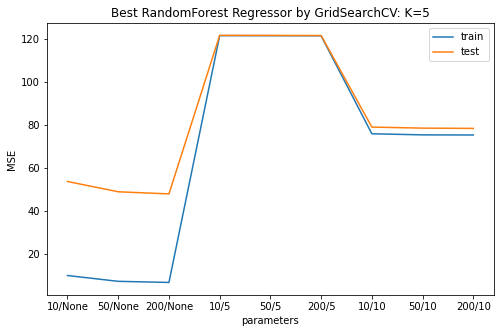

In [16]:
train_score=reg_rf.cv_results_['mean_train_score']
test_score=reg_rf.cv_results_['mean_test_score']
plt.figure(figsize=(8,5))
plt.plot(np.arange(9),-train_score,label='train')
plt.plot(np.arange(9),-test_score,label='test')
plt.legend()
plt.xticks(ticks=np.arange(9),
           labels=['10/None','50/None','200/None','10/5','50/5','200/5','10/10','50/10','200/10'])
plt.title('Best RandomForest Regressor by GridSearchCV: K=5')
plt.xlabel('parameters')
plt.ylabel('MSE')
plt.show()

In [17]:
reg_rf.best_params_

{'max_depth': None, 'n_estimators': 200}

As we can see from the previous cells, we are able to achieve a best MSE performance of **45.54** and a best R2 score of **0.8645** when the hyperparameters of Random Forest are set as (max_depth = None, n_estimators = 200). 

# Ethics & Privacy

There are no privacy issues during our collection of data. Our datasets used in this project are from the kaggle website and the author collected these data from spotify web Api. Our data contains only generalized statistics about artists and their track’s popularity, genre, etc. None of these values have identifiable information that can be traced back to individual Spotify users. Since the datasets were collected from the official spotify web api with over 600 thousands tracks and more than one million artists, we assumed that potential bias in the data collection is kept to a minimum. 

We stored the dataset in a private github repository that can be only accessed by the instructional team and our team members to ensure that our data is secured. 

During our EDA and data cleaning, we will make sure that we retain most of the original datasets to keep the data bias to a minimum. We will also make visualizations and analysis for the datasets so that we can discover interesting trends and spot any underlying bias within the dataset and address them accordingly. 

Our model utilizes different features of a song such as duration, danceability, etc to evaluate its popularity. We have checked the variables in the datasets and we have not found any data that appeared to be discriminatory. 

One ethical concern that this project may have is that artists may use our model to predict what features are important to the popularity of a song and then focus on satisfying these features when making new songs. This may result in less music produced in less popular genres. We plan to address this issue by setting our project private after the class so that people won’t have access to it.

# Team Expectations 

* We will keep an open line of communication via text messages and email.
* We will have group meetings to discuss the progress of the project.
* We promise to finish our respective parts on time.
* We will respect each other.
* We will reach out to each other for help if needed
* We will be open to constructive criticism without being defensive or negative.

# Project Timeline Proposal

**Important deadlines:**
* Final Project June 8


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/19  |  4 PM |  N/A  | Brainstorm topics/questions/dataset (all) | 
| 5/3  |  4 PM |  Project Proposal | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part | 
| 5/10  | 4 PM | Finish data cleaning/processing; Finish feature transformation such as OneHotEncoding, etc. | Review/Edit wrangling/EDA; Discuss Analysis Plan; Discuss possible approach to join the datasets; filter out unnecessary features; Create baseline model; Create plausible data visualizations   |
| 5/17  | 4 PM  | Finish EDA and analysis plan | Discuss/edit project code; Identify most important features; Create more advanced models; Cross validate and model selection; Evaluate our models; Improve our models; Complete project
   |
| 5/23  | 4 PM  | Finish the coding part of the project | Discuss/edit full project; Find any inconsistencies; Correct any errors  |
| 5/30  | 4 PM  |Finish the whole project| Turn in Final Project |

# Footnotes
<a name="reference_1"></a>1.[^](#ref_1): Picard, Madeleine Visualized: Can we Quantify the Most Popular Music? *DISPLAYR Blog*. https://www.displayr.com/most-popular-music/<br> 

<a name="reference_2"></a>2.[^](#ref_2): Peker, Philip (25 Jun 2021) Predicting Popularity on Spotify — When Data Needs Culture More than Culture Needs Data. *Towards Data Science*. https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1<br> 

<a name="reference_3"></a>3.[^](#ref_3): Larkin, Taylor (October 24, 2018). Understanding Song Popularity with Automated Machine Learning. *DataRobot* https://www.datarobot.com/blog/understanding-song-popularity-with-automated-machine-learning/ <br>

<a name="data_ref"></a>4.[^](#data): Kaggle https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks<br>